In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

# Fetch CO+ excited states (Task F)

In [13]:
path = "pes_scan/pes_mrci.tab"

r = []
E_MRCI_1_1 = []
E_MRCI_2_1 = []
E_MRCI_3_1 = []
E_MRCI_1_2 = []
E_MRCI_1_3 = []

with open(path, "r") as f:
    for line in f:
        try:
            splits = list(map(float, line.split()))

            r.append(splits[0])
            E_MRCI_1_1.append(splits[1])
            E_MRCI_2_1.append(splits[2])
            E_MRCI_3_1.append(splits[3])
            E_MRCI_1_2.append(splits[4])
            E_MRCI_1_3.append(splits[5])
        except:
            pass
        
#r = np.asarray(r)
E_MRCI_1_1 = np.asarray(E_MRCI_1_1)
E_MRCI_2_1 = np.asarray(E_MRCI_2_1)
E_MRCI_3_1 = np.asarray(E_MRCI_3_1)
E_MRCI_1_2 = np.asarray(E_MRCI_1_2)
E_MRCI_1_3 = np.asarray(E_MRCI_1_3)

## CO+ GS (TaskE/pes) 

In [24]:
path = "../TaskE/pes/pes.tab"

r_CO_pls = []
E_CO_pls_CCSDT = []

with open(path, "r") as f:
    for line in f:
        try:
            splits = list(map(float, line.split()))

            r_CO_pls.append(splits[0])
            E_CO_pls_CCSDT.append(splits[2])
        except:
            pass
        
r_CO_pls = np.asarray(r_CO_pls)
E_CO_pls_CCSDT = np.asarray(E_CO_pls_CCSDT)

## Fetch CO states (Task B)

In [14]:
path = "../TaskC/pes.tab"

r_CO = []
E_CCSDT = []

with open(path, "r") as f:
    for line in f:
        try:
            splits = list(map(float, line.split()))

            r_CO.append(splits[0])
            E_CCSDT.append(splits[2])
        except:
            pass
        
r_CO = np.asarray(r_CO)
E_CCSDT = np.asarray(E_CCSDT)

# Interpolate

In [26]:
from scipy.interpolate import PchipInterpolator as PChip

interpolator_MRCI_1_1 = PChip(r, E_MRCI_1_1)
interpolator_MRCI_2_1 = PChip(r, E_MRCI_2_1)
interpolator_MRCI_3_1 = PChip(r, E_MRCI_3_1)
interpolator_MRCI_1_2 = PChip(r, E_MRCI_1_2)
interpolator_MRCI_1_3 = PChip(r, E_MRCI_1_3)

interpolator_CO_CCSDT = PChip(r_CO, E_CCSDT)
interpolator_CO_pls_CCSDT = PChip(r_CO_pls, E_CO_pls_CCSDT)


# Minimum Energies 

In [16]:
def minimumEnergyPosition(interpolator):
    t = np.linspace(0.8, 1.8)
    index = np.argmin(interpolator(t))
    return t[index], float(interpolator(t[index]))

In [27]:
print("CO GS", minimumEnergyPosition(interpolator_CO_CCSDT))

CO GS (1.126530612244898, -113.19236114183698)


In [28]:
print("CO+ GS", minimumEnergyPosition(interpolator_CO_pls_CCSDT))

CO+ GS (1.2897959183673469, -112.36916825762245)


In [17]:
print("1.1", minimumEnergyPosition(interpolator_MRCI_1_1))
print("2.1", minimumEnergyPosition(interpolator_MRCI_2_1))
print("3.1", minimumEnergyPosition(interpolator_MRCI_3_1))
print("1.2", minimumEnergyPosition(interpolator_MRCI_1_2))
print("1.3", minimumEnergyPosition(interpolator_MRCI_1_3))

1.1 (1.1061224489795918, -112.6677141576045)
2.1 (1.1877551020408164, -112.4578991565325)
3.1 (1.3918367346938776, -112.37648587942093)
1.2 (1.2081632653061225, -112.57175765264711)
1.3 (1.2081632653061225, -112.57291479919749)


# Plot 

## All 

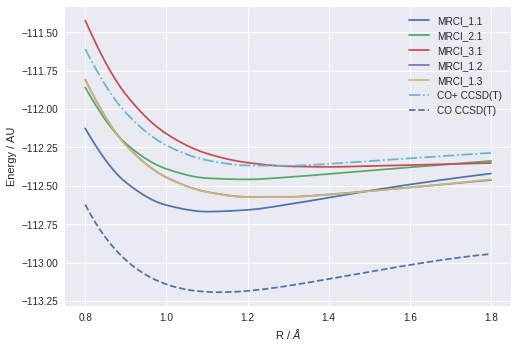

In [30]:
t = np.linspace(0.8, 1.8, 500)

plt.plot(t, interpolator_MRCI_1_1(t), label="MRCI_1.1")
plt.plot(t, interpolator_MRCI_2_1(t), label="MRCI_2.1")
plt.plot(t, interpolator_MRCI_3_1(t), label="MRCI_3.1")
plt.plot(t, interpolator_MRCI_1_2(t), label="MRCI_1.2")
plt.plot(t, interpolator_MRCI_1_3(t), label="MRCI_1.3")

plt.plot(t, interpolator_CO_pls_CCSDT(t), "-.", label="CO+ UCCSD(T)")

plt.plot(t, interpolator_CO_CCSDT(t), "--", label="CO CCSD(T)")

plt.xlabel("R / $\AA$")
plt.ylabel("Energy / AU")

plt.legend()

## Centered 

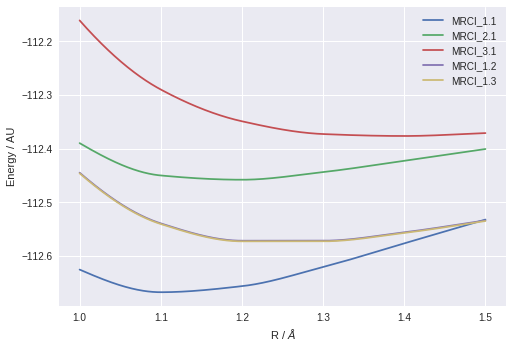

In [19]:
t = np.linspace(1.0, 1.5, 500)

plt.plot(t, interpolator_MRCI_1_1(t), label="MRCI_1.1")
plt.plot(t, interpolator_MRCI_2_1(t), label="MRCI_2.1")
plt.plot(t, interpolator_MRCI_3_1(t), label="MRCI_3.1")
plt.plot(t, interpolator_MRCI_1_2(t), label="MRCI_1.2")
plt.plot(t, interpolator_MRCI_1_3(t), label="MRCI_1.3")

plt.xlabel("R / $\AA$")
plt.ylabel("Energy / AU")

plt.legend()